In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from glob import glob
from tqdm import tqdm

In [32]:
import matplotlib as mpl

mpl.style.use('seaborn-paper')

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.figsize'] = (10.0, 6.0)


# $\hat{d}$ comparison

In [33]:
def read_all_iterations(paths):
    all_iter_results = []
    for path in paths:
        iter_result = np.loadtxt(path)
        all_iter_results.append(iter_result)
    return all_iter_results

def get_paths_to_res(sinkhorn='base', results_path = '../results/multi'):
    flows_paths = sorted(glob(f'{results_path}/flows/{sinkhorn}*'))
    times_paths = sorted(glob(f'{results_path}/times/{sinkhorn}*'))
    corr_matrix_paths = sorted(glob(f'{results_path}/corr_matrix/{sinkhorn}*'))
    inverse_func_paths = sorted(glob(f'{results_path}/inverse_func/{sinkhorn}*'))
    subg_paths = sorted(glob(f'{results_path}/subg/{sinkhorn}*'))
        
    return flows_paths, times_paths, corr_matrix_paths, inverse_func_paths, subg_paths

def read_all_res(paths):
    flows_paths, times_paths, corr_matrix_paths, inverse_func_paths, subg_paths = paths
    print(f'reading flows...')
    all_flows = read_all_iterations(flows_paths)
    print(f'reading times...')
    all_times = read_all_iterations(times_paths)
    print(f'reading corr matrix...')
    all_corr_matrix = read_all_iterations(corr_matrix_paths)
    print(f'reading inv funcs...')
    all_inverse_func = read_all_iterations(inverse_func_paths)
    print(f'reading subg...')
    all_subg = read_all_iterations(subg_paths)
    return all_flows, all_times, all_corr_matrix, all_inverse_func, all_subg


acc_paths = get_paths_to_res(sinkhorn='accelerated')
all_flows, all_times, all_corr_matrix, all_inverse_func, all_subg = read_all_res(acc_paths)

base_paths = get_paths_to_res(sinkhorn='base')
all_flows_base, all_times_base, all_corr_matrix_base, all_inverse_func_base, all_subg_base = read_all_res(base_paths)



reading flows...
reading times...
reading corr matrix...
reading inv funcs...
reading subg...
reading flows...
reading times...
reading corr matrix...
reading inv funcs...
reading subg...


In [41]:
diffs = []
for i in range(len(all_corr_matrix)):
    diff = np.sum((all_corr_matrix[i] - all_corr_matrix_base[i])**2) / (all_corr_matrix[i].shape[0] **2)
    diffs.append(diff)
np.mean(diffs)

1.159502009439719

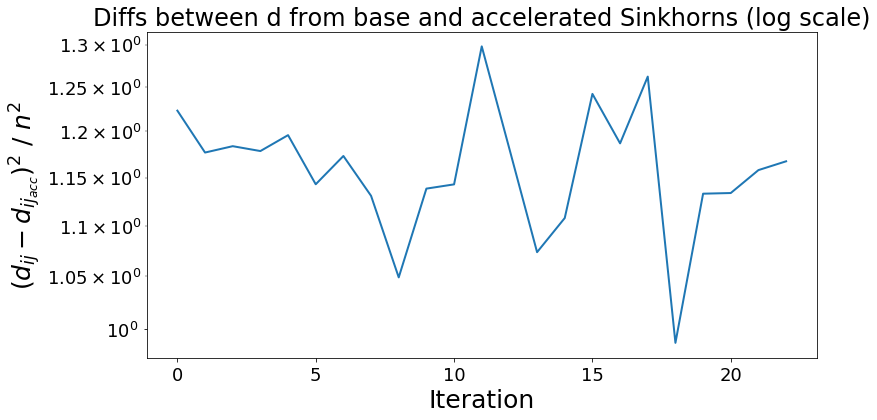

In [35]:
plt.figure(figsize=(12,6))
plt.title("Diffs between d from base and accelerated Sinkhorns (log scale)")
plt.xlabel('Iteration')
plt.ylabel('$(d_{ij} - d_{ij_{acc}})^2 ~/~ n^2$') 
plt.plot(diffs[:])
plt.yscale('log')
plt.savefig('../pics/d_diffs_log.png')
plt.show()

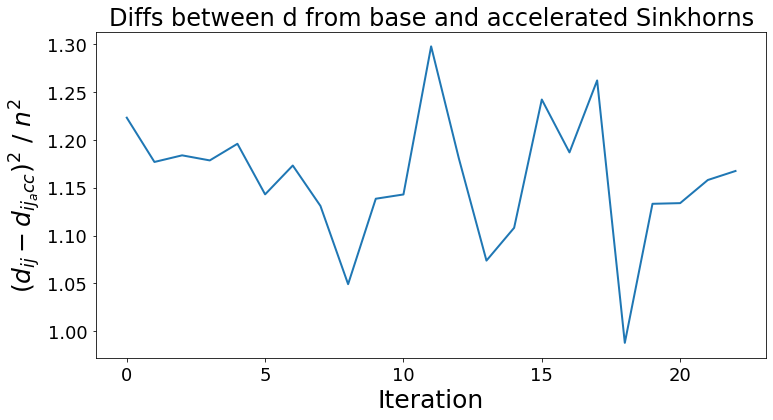

In [36]:
plt.figure(figsize=(12,6))
plt.title("Diffs between d from base and accelerated Sinkhorns")
plt.xlabel('Iteration')
plt.ylabel('$(d_{ij} - d_{ij_acc})^2 ~/~ n^2$') 
plt.plot(diffs[:])
plt.savefig('../pics/d_diffs.png')
plt.show()

# Number of iterations compare

In [37]:
iter_nums_base_path = '../results/multi/base_sinkhorns_it_nums.txt'
iter_nums_acc_path = '../results/multi/accelerated_sinkhorns_it_nums.txt'

sinkhorns_it_nums = np.loadtxt(iter_nums_base_path)
sinkhorns_acc_it_nums = np.loadtxt(iter_nums_acc_path)

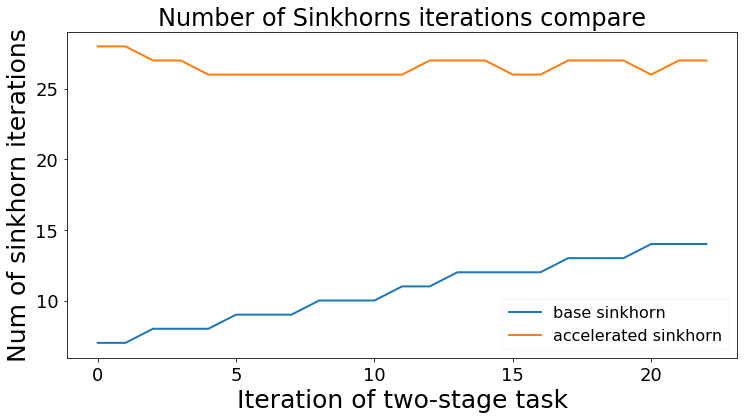

In [38]:
plt.figure(figsize=(12,6))
plt.title("Number of Sinkhorns iterations compare")
plt.xlabel('Iteration of two-stage task')
plt.ylabel('Num of sinkhorn iterations') 
plt.plot(sinkhorns_it_nums, label='base sinkhorn')
plt.plot(sinkhorns_acc_it_nums, label='accelerated sinkhorn')
plt.legend()
plt.savefig('../pics/iter_nums_compare.png')
plt.show()

# Compare convergence 

##### Критерий


$\| \nabla f(t^k) \|_2 * 2\|t^0 - t^k\|_2 $

In [39]:
def criteria(inv, sbg, t, t_0):
    f = sbg + inv
    return np.linalg.norm(f) * np.linalg.norm(2*t_0)

crit, crit_acc = [], []
for i in range(len(all_subg_base)):
    crit.append(criteria(all_inverse_func_base[i], all_subg_base[i], all_times_base[i], all_times_base[0]))
for i in range(len(all_subg)):
    crit_acc.append(criteria(all_inverse_func[i], all_subg[i], all_times[i], all_times[0]))

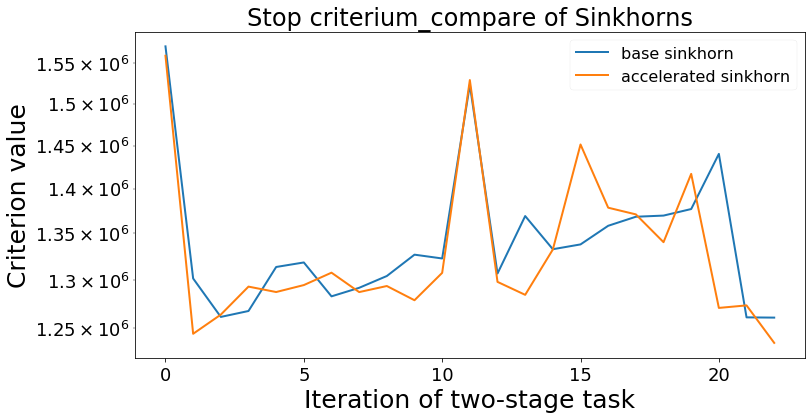

In [40]:
plt.figure(figsize=(12,6))
plt.title("Stop criterium_compare of Sinkhorns")
plt.xlabel('Iteration of two-stage task')
plt.ylabel('Criterion value') 
plt.plot(crit, label='base sinkhorn')
plt.plot(crit_acc, label='accelerated sinkhorn')
plt.yscale('log')
plt.legend()
plt.savefig('../pics/stop_criterium_compare.png')
plt.show()